#                                     DATA EXPLORATORY ANALYSIS FOR CREDIT CARD

### Import necessary libraries

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

### Import the datasets

In [229]:
customer=pd.read_csv('Customer Acqusition.csv')
spend=pd.read_csv('spend.csv')
repay= pd.read_excel("Repayment.xlsx")

In [230]:
customer.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [231]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


In [232]:
repay.head(3)

,SL No:,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75
1,2.0,A1,2004-01-03,245899.02
2,3.0,A1,2004-01-15,259490.06


### Exploratory Data Analysis

In [233]:
print(customer.shape)
print(repay.shape)
print(spend.shape)

(100, 8)
(1500, 4)
(1500, 5)


In [234]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [235]:
repay.dtypes

SL No:             float64
Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [236]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [237]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [238]:
repay.isnull().sum()

SL No:      1
Customer    0
Month       0
Amount      0
dtype: int64

In [239]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

# 1. In the above dataset

## a. In case age is less than 18, replace it with mean of age values.

In [240]:
mean_original = customer["Age"].mean()

In [241]:
print("The mean of Age column is",mean_original)

The mean of Age column is 46.49


In [242]:
#replacing age less than 18 with mean of age values
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [243]:
mean_new = customer["Age"].mean()

In [244]:
print("The new mean of Age column is",mean_new)

The new mean of Age column is 48.39940000000001


In [245]:
customer.loc[customer["Age"] < 18,"Age"]

Series([], Name: Age, dtype: float64)

In [246]:
print("All the customers who have age less than 18 have been replaced by mean of the age column.")

All the customers who have age less than 18 have been replaced by mean of the age column.


## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

#### Merging the customer table and spend table

In [247]:
customer_spend = pd.merge(left=customer,right=spend,on='Customer',how='inner')
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [248]:
customer_spend.shape

(1500, 12)

In [249]:
#all the customers whose spend amount is more than the limit,replacing with 50% of that customer’s limit
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [250]:
#if customer's spend amount is more than the limit,replacing with 50% of that customer’s limit
customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [251]:
#there are no customers left whose spend amount is more than the limit
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


## (c) Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [252]:
#merging customer and spend table on the basis of "Customer" column
customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")

In [253]:
customer_repay.head()

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [254]:
#all the customers where repayment amount is more than the limit.
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
18,8.0,A8,2004-02-05,156913.59,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,110.0,A8,2004-01-12,350999.98,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,124.0,A8,2006-03-31,155642.95,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,138.0,A8,2005-05-09,145457.38,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,152.0,A8,2006-05-08,361184.89,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...
1494,259.0,A7,2006-05-06,400375.97,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,2005-12-03,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,2005-02-23,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,2006-03-31,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [255]:
#customers where repayment amount is more than the limit, replacing the repayment with the limit.
customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [256]:
#there are no customers left where repayment amount is more than the limit.
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment


## (2) From the above dataset create the following summaries:

## (a) How many distinct customers exist?

In [257]:
distinct_customers = customer["Customer"].nunique()

In [258]:
print("Number of distinct customers are",distinct_customers)

Number of distinct customers are 100


## (b) How many distinct categories exist?

In [259]:
#customers from different segments
customer["Segment"].value_counts()

Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Segment'>

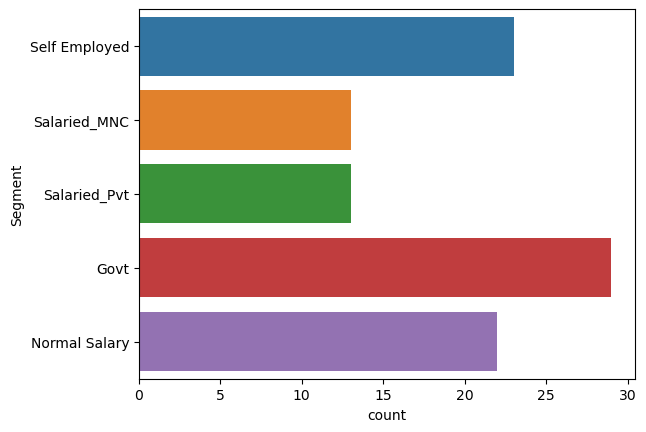

In [260]:
sns.countplot(y = 'Segment',data=customer)

## c. What is the average monthly spend by customers?

In [261]:
# converting Month_spend and Month_repay data type to date time

In [262]:
spend['Month'] = pd.to_datetime(spend['Month'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4376\1599234366.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend['Month'] = pd.to_datetime(spend['Month'])


In [263]:
repay['Month'] = pd.to_datetime(repay['Month'])

In [264]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [265]:
spend['Monthly'] =spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [266]:
spend['Yearly'] =spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [267]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [268]:
cust_spend = round(spend.groupby(by=['Yearly','Monthly']).Amount.mean(),2).reset_index()
cust_spend

,Yearly,Monthly,Amount
0,2004,April,235272.04
1,2004,February,221215.27
2,2004,January,251712.07
3,2004,March,232146.12
4,2004,May,217539.24
5,2004,November,270486.40
6,2004,September,310923.38
7,2005,April,252181.33
8,2005,August,233734.63
9,2005,December,147503.06


## (d) What is the average monthly repayment by customers?

In [269]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1499 non-null   float64       
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 47.0+ KB


In [270]:
repay['Monthly'] =repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [271]:
repay['Yearly'] =repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [272]:
repay

,SL No:,Customer,Month,Amount,Monthly,Yearly
0,NaN,A1,2004-01-12,495414.75,January,2004
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,2005
1496,1497.0,A68,2006-05-10,319836.49,May,2006
1497,1498.0,A69,2006-07-11,247628.45,July,2006
1498,1499.0,A70,2005-08-12,454016.51,August,2005


In [273]:
cust_repay = round(repay.groupby(by=['Yearly','Monthly']).Amount.mean().reset_index(),2)
cust_repay

,Yearly,Monthly,Amount
0,2004,April,259141.68
1,2004,February,256702.63
2,2004,January,243489.65
3,2004,March,252585.28
4,2004,May,226162.72
5,2004,November,209592.24
6,2004,September,184487.85
7,2005,April,212688.63
8,2005,August,264430.92
9,2005,December,320379.34


## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [274]:
# Merging all three tables
customer_final = pd.merge(left=customer_spend , right=repay , on=['Customer'] , how='inner',suffixes=('_spend','_repay'))
customer_final

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January,2004
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January,2004
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January,2004
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January,2004


In [275]:
# renaming the columns for clearity
customer_final.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [276]:
customer_final.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,NaN,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,2005-01-17,165972.88,January,2005


In [277]:
# grouping the data based on "Yearly","Month_x" columns to get the 'Spend_Amount'and 'Repay_Amount'
interest_group = customer_final.groupby(["Yearly","Monthly"])[['Amount_spend','Amount_repay']].sum()
interest_group

Amount_spend  Amount_repay
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

In [278]:
# Monthly Profit = Monthly repayment – Monthly spend.
interest_group['monthly_profit'] = interest_group.Amount_repay - interest_group.Amount_spend
interest_group

Amount_spend  Amount_repay  monthly_profit
Yearly Monthly                                              
2004   April      1.194516e+08  2.285403e+08    1.090887e+08
       February   7.613922e+07  1.602419e+08    8.410268e+07
       January    1.088357e+09  1.699210e+09    6.108525e+08
       March      5.594171e+07  8.974470e+07    3.380298e+07
       May        8.800456e+07  1.411594e+08    5.315485e+07
       November   5.504612e+07  7.860290e+07    2.355678e+07
       September  5.144278e+07  8.016122e+07    2.871844e+07
2005   April      9.366405e+07  1.747894e+08    8.112539e+07
       August     1.361400e+08  2.477449e+08    1.116049e+08
       December   4.348638e+07  9.944533e+07    5.595895e+07
       February   5.890557e+08  9.416163e+08    3.525606e+08
       January    1.324129e+08  1.810333e+08    4.862042e+07
       July       3.995653e+07  7.997268e+07    4.001615e+07
       June       1.174019e+08  2.213774e+08    1.039755e+08
       May        7.149030e+08  1.099197e+09    3.842944e+08
       November   1.532278e+08  2.763119e+08    1.230841e+08
       October    3.140993e+07  6.027830e+07    2.886837e+07
       September  3.195551e+07  7.530449e+07    4.334898e+07
2006   April      3.229722e+08  6.093666e+08    2.863944e+08
       August     5.849630e+07  7.167032e+07    1.317402e+07
       December   4.585222e+07  7.087702e+07    2.502480e+07
       February   1.654843e+08  2.903280e+08    1.248436e+08
       January    5.127574e+07  8.974491e+07    3.846917e+07
       July       1.444093e+08  2.245720e+08    8.016271e+07
       June       5.302118e+07  6.914431e+07    1.612313e+07
       March      7.393854e+08  1.115725e+09    3.763400e+08
       May        3.297954e+08  5.434823e+08    2.136869e+08
       November   1.124836e+08  1.355832e+08    2.309955e+07
       October    5.285823e+07  7.890924e+07    2.605102e+07
       September  5.395681e+07  8.083199e+07    2.687518e+07

In [279]:
interest_group['interst_earned'] = interest_group.monthly_profit * 0.029
interest_group

Amount_spend  Amount_repay  monthly_profit  interst_earned
Yearly Monthly                                                              
2004   April      1.194516e+08  2.285403e+08    1.090887e+08    3.163572e+06
       February   7.613922e+07  1.602419e+08    8.410268e+07    2.438978e+06
       January    1.088357e+09  1.699210e+09    6.108525e+08    1.771472e+07
       March      5.594171e+07  8.974470e+07    3.380298e+07    9.802865e+05
       May        8.800456e+07  1.411594e+08    5.315485e+07    1.541491e+06
       November   5.504612e+07  7.860290e+07    2.355678e+07    6.831466e+05
       September  5.144278e+07  8.016122e+07    2.871844e+07    8.328349e+05
2005   April      9.366405e+07  1.747894e+08    8.112539e+07    2.352636e+06
       August     1.361400e+08  2.477449e+08    1.116049e+08    3.236542e+06
       December   4.348638e+07  9.944533e+07    5.595895e+07    1.622810e+06
       February   5.890557e+08  9.416163e+08    3.525606e+08    1.022426e+07
       January    1.324129e+08  1.810333e+08    4.862042e+07    1.409992e+06
       July       3.995653e+07  7.997268e+07    4.001615e+07    1.160468e+06
       June       1.174019e+08  2.213774e+08    1.039755e+08    3.015290e+06
       May        7.149030e+08  1.099197e+09    3.842944e+08    1.114454e+07
       November   1.532278e+08  2.763119e+08    1.230841e+08    3.569438e+06
       October    3.140993e+07  6.027830e+07    2.886837e+07    8.371827e+05
       September  3.195551e+07  7.530449e+07    4.334898e+07    1.257121e+06
2006   April      3.229722e+08  6.093666e+08    2.863944e+08    8.305437e+06
       August     5.849630e+07  7.167032e+07    1.317402e+07    3.820465e+05
       December   4.585222e+07  7.087702e+07    2.502480e+07    7.257193e+05
       February   1.654843e+08  2.903280e+08    1.248436e+08    3.620465e+06
       January    5.127574e+07  8.974491e+07    3.846917e+07    1.115606e+06
       July       1.444093e+08  2.245720e+08    8.016271e+07    2.324719e+06
       June       5.302118e+07  6.914431e+07    1.612313e+07    4.675707e+05
       March      7.393854e+08  1.115725e+09    3.763400e+08    1.091386e+07
       May        3.297954e+08  5.434823e+08    2.136869e+08    6.196920e+06
       November   1.124836e+08  1.355832e+08    2.309955e+07    6.698869e+05
       October    5.285823e+07  7.890924e+07    2.605102e+07    7.554795e+05
       September  5.395681e+07  8.083199e+07    2.687518e+07    7.793803e+05

## f. What are the top 5 product types?

In [280]:
Top_5 =spend.Type.value_counts().head()
Top_5

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

<Axes: xlabel='Type'>

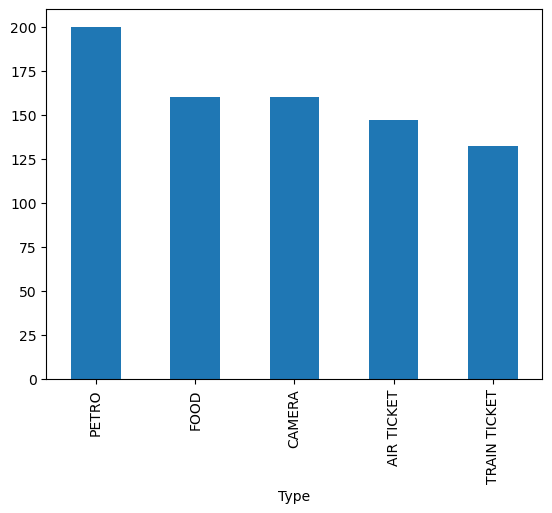

In [281]:
Top_5 =spend.Type.value_counts().head().plot(kind='bar')
Top_5

## g. Which city is having maximum spend?

In [282]:
spend1 = customer_spend.groupby(by='City').Amount.sum().sort_values(ascending = False)
spend1

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

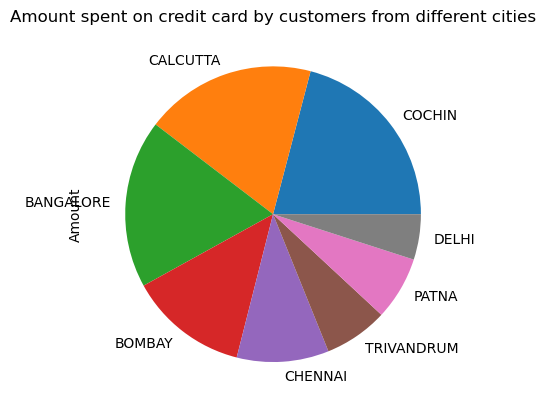

In [283]:
spend1.plot(kind='pie')
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

## h. Which age group is spending more money?

In [284]:
customer_spend.Age.min()

19.0

In [285]:
customer_spend.Age.max()

79.0

In [286]:
customer_spend['Age_group'] = pd.cut(customer_spend.Age,5)
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(67.0, 79.0]"
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,"(67.0, 79.0]"
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,"(67.0, 79.0]"
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,"(67.0, 79.0]"
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,"(67.0, 79.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,"(43.0, 55.0]"
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,"(55.0, 67.0]"
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,"(43.0, 55.0]"
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,"(31.0, 43.0]"


In [287]:
max_cust = customer_spend.groupby(by='Age_group').Amount.sum().sort_values(ascending= False)
max_cust

Age_group
(43.0, 55.0]     69886504.61
(18.94, 31.0]    53002612.58
(31.0, 43.0]     46075008.70
(67.0, 79.0]     29636001.68
(55.0, 67.0]     21180957.66
Name: Amount, dtype: float64

<Axes: ylabel='Amount'>

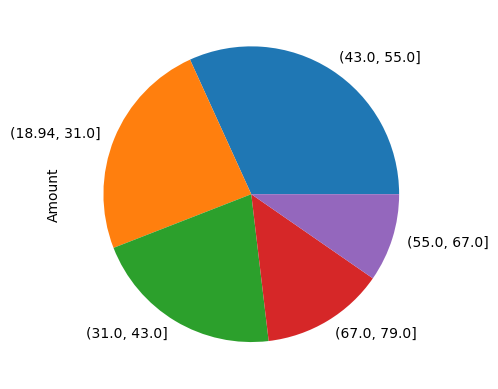

In [288]:
max_cust.plot(kind='pie')

## i. Who are the top 10 customers in terms of repayment?

In [289]:
cust_Repay = repay.groupby(by='Customer').Amount.sum().sort_values(ascending = False).head(10)
cust_Repay

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64

<Axes: xlabel='Customer'>

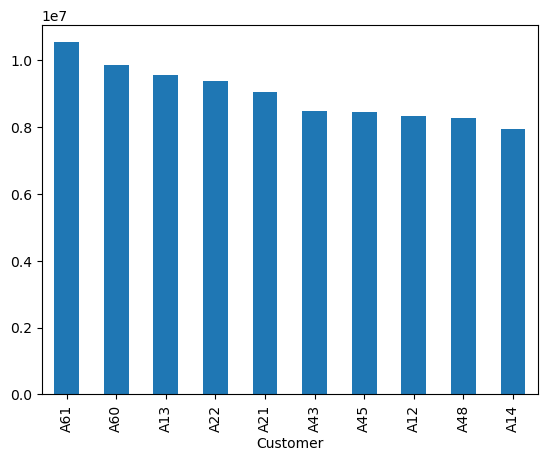

In [290]:
cust_Repay.plot(kind='bar')

# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [291]:
customer_spend['Month'] = pd.to_datetime(customer_spend['Month'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4376\1220242578.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_spend['Month'] = pd.to_datetime(customer_spend['Month'])


In [292]:
customer_spend.dtypes

No                    int64
Customer             object
Age                 float64
City                 object
Product              object
Limit               float64
Company              object
Segment              object
Sl No:                int64
Month        datetime64[ns]
Type                 object
Amount              float64
Age_group          category
dtype: object

In [293]:
customer_spend['Years'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Years
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,"(67.0, 79.0]",2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,"(67.0, 79.0]",2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,"(67.0, 79.0]",2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,"(67.0, 79.0]",2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,"(67.0, 79.0]",2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,"(43.0, 55.0]",2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,"(55.0, 67.0]",2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,"(43.0, 55.0]",2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,"(31.0, 43.0]",2004


In [294]:
customer_spend_pivot = customer_spend.pivot_table(index=['City','Years'],columns='Product',values= 'Amount',aggfunc='sum')
customer_spend_pivot

Product                  Gold    Platimum      Silver
City       Years                                     
BANGALORE  2004    9289878.54  1112732.30  1291852.58
           2005   12892362.99   912284.97   830612.34
           2006   12030611.09   685831.27  1415480.94
BOMBAY     2004    6987853.53   897264.94   532089.03
           2005    8983018.28   711804.94   508988.54
           2006    7917144.31   972130.01  1092833.80
CALCUTTA   2004    7477140.98  2037690.30   500006.00
           2005   10303355.80  4434696.31   440147.06
           2006   11167532.77  3589606.66  1157956.42
CHENNAI    2004    1059618.50  3535652.38   282056.86
           2005    3740945.58  5053956.32   377184.49
           2006    2704288.62  5024923.40   350009.50
COCHIN     2004    7315850.15  3419904.07   814229.62
           2005   12110613.03  4960921.71   652269.38
           2006   10499142.38  4920592.29  1269990.87
DELHI      2004    2806495.00   283512.89   768172.30
           2005    1964845.27   494157.86   612311.21
           2006    2957103.32   176788.72   854899.97
PATNA      2004    2072567.90  1113069.60   756684.10
           2005    3252615.77  2883231.07   950094.19
           2006    2276181.69  1256137.65   700005.00
TRIVANDRUM 2004    2415102.84  2161676.67   209667.48
           2005    1240375.85  3601443.30   269912.99
           2006    2735710.87  2147403.75   555862.12

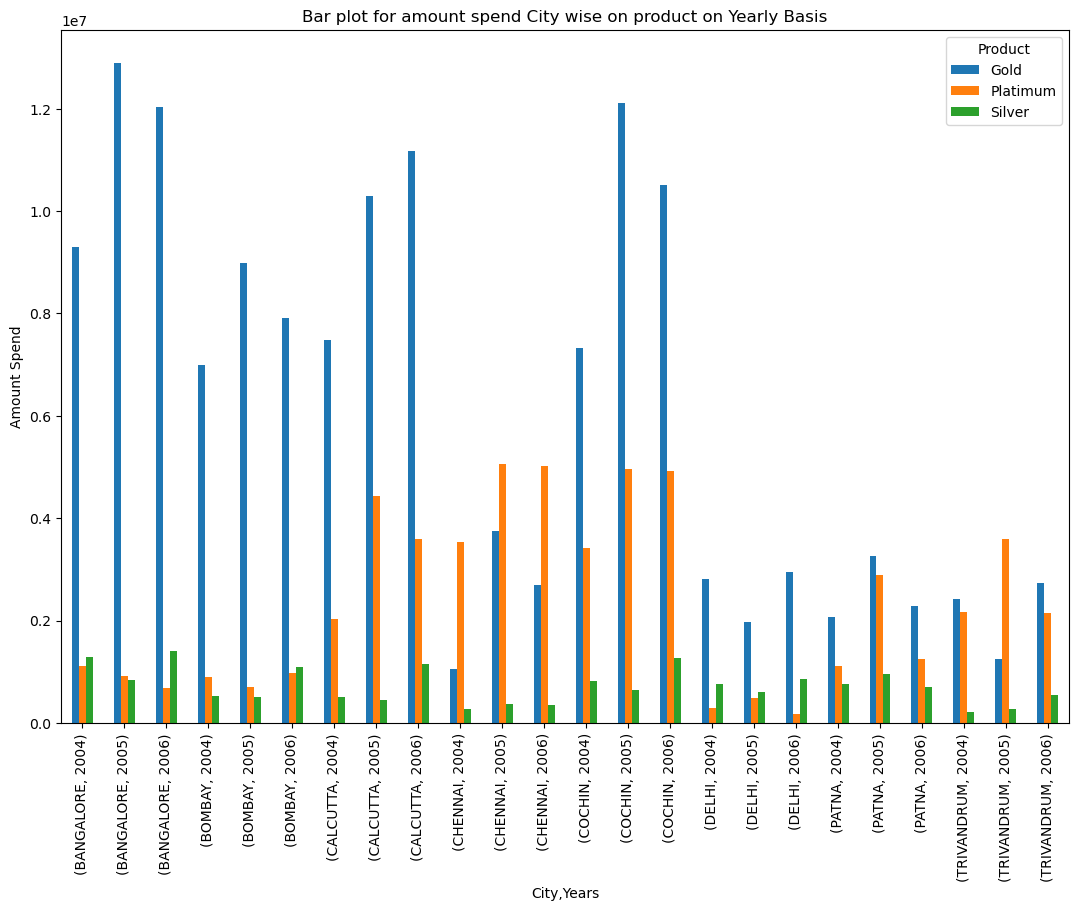

In [295]:
customer_spend_pivot.plot(kind = 'bar',figsize=(13,9))
plt.ylabel('Amount Spend')
plt.title("Bar plot for amount spend City wise on product on Yearly Basis")
plt.show()

# 4. Create graphs for

## a. Monthly comparison of total spends, city wise

In [296]:
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [297]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Years,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,"(67.0, 79.0]",2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,"(67.0, 79.0]",2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,"(67.0, 79.0]",2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,"(67.0, 79.0]",2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,"(67.0, 79.0]",2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,"(43.0, 55.0]",2004,January
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,"(55.0, 67.0]",2004,January
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,"(43.0, 55.0]",2004,January
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,"(31.0, 43.0]",2004,January


In [298]:
city_wise_spend = customer_spend.groupby(by=['Monthly','City']).Amount.sum().sort_index().reset_index()
city_wise_spend

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [299]:
city_wise_spend = pd.pivot_table(index='City',columns='Monthly',values='Amount',data=customer_spend,aggfunc='sum')
city_wise_spend

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


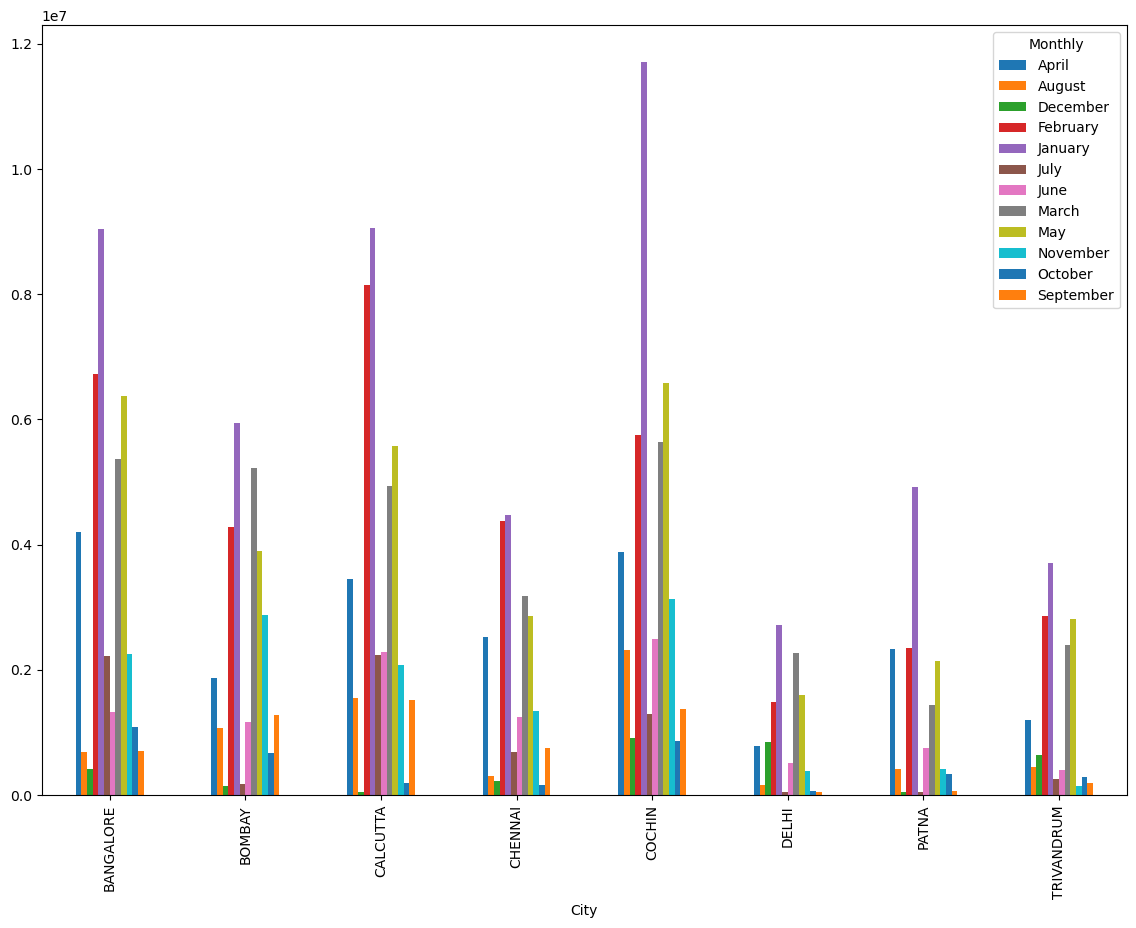

In [300]:
city_wise_spend.plot(kind='bar',figsize=(14,10))
plt.show()

## b. Comparison of yearly spend on air tickets

In [301]:
air_tickets = customer_spend.groupby(by=['Years','Type']).Amount.sum().reset_index()
air_tickets.head()

,Years,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72


In [302]:
#filtering air tickets METHOD 1

at = air_tickets[air_tickets.Type == 'AIR TICKET']
at

,Years,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


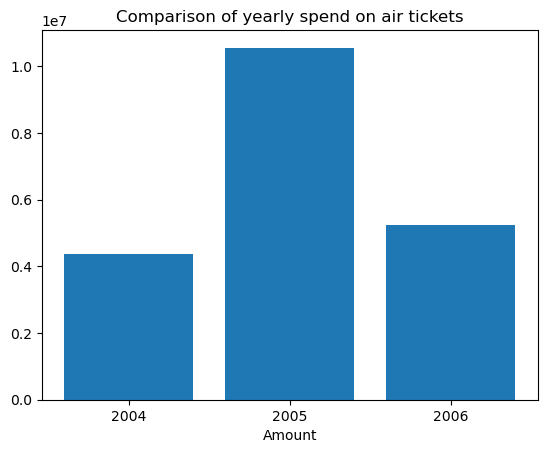

In [303]:
plt.bar(at.Years,height=at.Amount)
plt.xlabel('AIR TICKET')
plt.xlabel('Amount')
plt.title("Comparison of yearly spend on air tickets")
plt.show()

## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [304]:
prod = customer_spend.pivot_table(index='Product',columns='Monthly',values='Amount',aggfunc='sum')
prod.T

Product,Gold,Platimum,Silver
Monthly,,,
April,13170572.59,5182493.86,1902322.65
August,4954030.42,1714762.80,293109.82
December,2332940.96,750156.19,200537.90
February,24779179.55,9134054.58,2087018.37
January,32413831.83,14951578.51,4206383.62
July,5167416.37,1288156.26,530153.72
June,6538862.64,2965712.71,689537.61
March,19256972.48,7288837.68,3909405.83
May,21548169.76,8151926.49,2140940.01


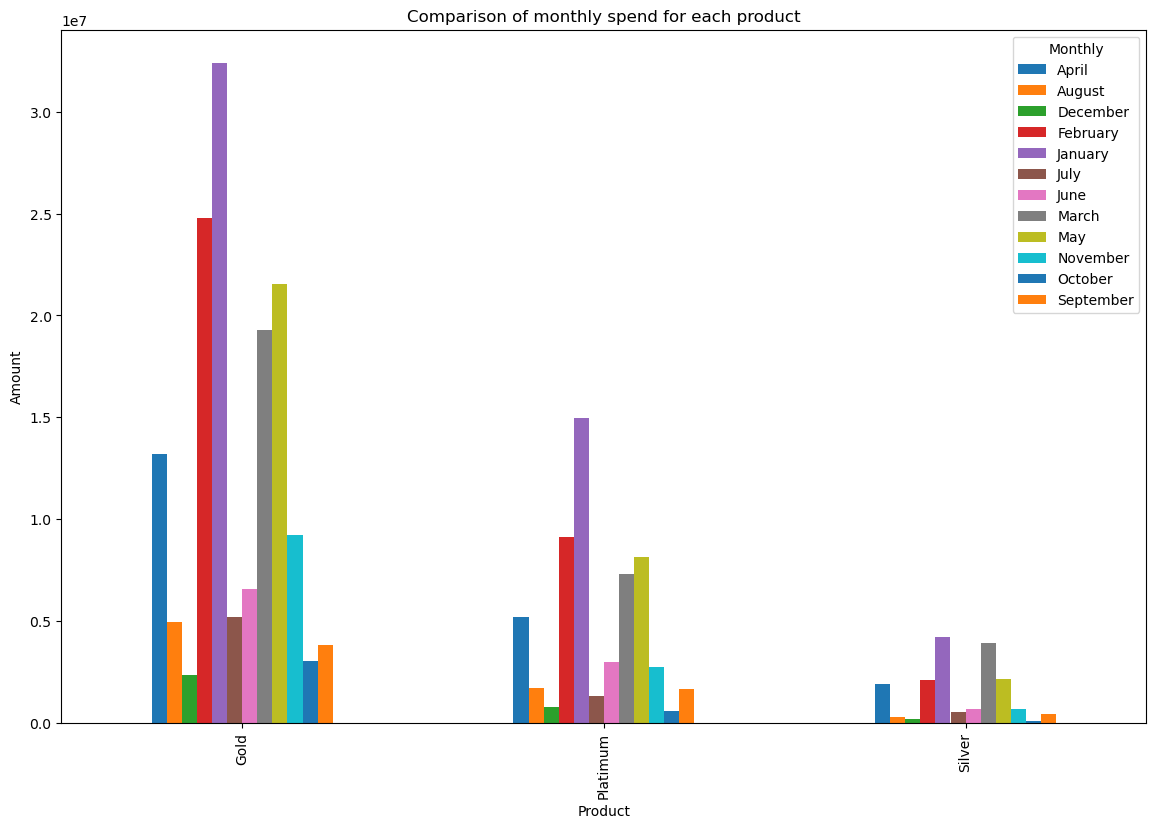

In [305]:
prod.plot(kind='bar',figsize=(14,9))
plt.xlabel('Product')
plt.ylabel('Amount')
plt.title('Comparison of monthly spend for each product')
plt.show()

# 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [306]:
customer_repay["Month"]=pd.to_datetime(customer_repay["Month"])
def top_customers_by_city(customer_repay, city, product, time_period):
    filtered_data = customer_repay[(customer_repay['City'] == city) & (customer_repay['Product'] == product)]
    if time_period == 'yearly':
        filtered_data['Time Period'] = customer_repay["Month"].dt.year
    elif time_period == 'monthly':
        filtered_data['Time Period'] = customer_repay["Month"].dt.month
    else:
        return "Invalid time period specified. Please choose 'yearly' or 'monthly'."
    grouped_data = filtered_data.groupby(['Customer', 'Time Period','City'])['Amount'].sum().reset_index()

    top_customers = grouped_data.nlargest(10, 'Amount').reset_index(drop=True)

    return top_customers

city = 'CALCUTTA'
product = 'Gold' 
time_period = 'monthly' 

top_customers_by_city(customer_repay, city, product, time_period)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4376\3591256833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time Period'] = customer_repay["Month"].dt.month


,Customer,Time Period,City,Amount
0,A29,5,CALCUTTA,2612139.63
1,A60,1,CALCUTTA,2465584.81
2,A60,4,CALCUTTA,2397565.91
3,A15,5,CALCUTTA,1953768.97
4,A15,3,CALCUTTA,1738696.08
5,A29,1,CALCUTTA,1474900.52
6,A31,5,CALCUTTA,1432949.95
7,A60,2,CALCUTTA,1403731.08
8,A29,3,CALCUTTA,1269579.93
9,A60,5,CALCUTTA,1189900.27
